In [2]:
# Importing important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import sys
from sklearn.svm import SVC
from sklearn.preprocessing import MaxAbsScaler,MinMaxScaler,StandardScaler,scale
from sklearn.pipeline import make_pipeline
import scikitplot as skplt
from sklearn.model_selection import learning_curve
from mlxtend.evaluate import bias_variance_decomp
from mlxtend.plotting import plot_learning_curves
# %pip install scikit-plot

In [3]:
#Reading training and testing data files
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Separating out data into label values and pixel values array
y = train_data['label'].values
X = train_data.drop('label', axis=1).values
X1 = test_data.values
y.shape,X.shape,X1.shape


((42000,), (42000, 784), (28000, 784))

C:\Users\DiyaK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

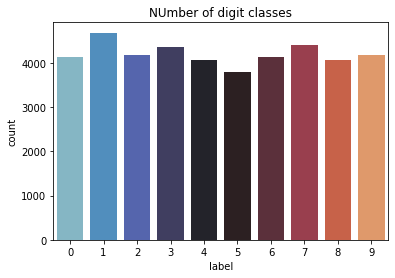

In [5]:
#Frequency count chart
plt.plot(figure = (16,10))
g = sns.countplot( train_data["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
train_data.label.astype('category').value_counts()

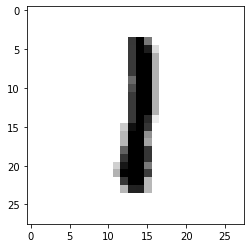

In [6]:
#Visualizing a random handwritten digit
some_digit = X[41]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")


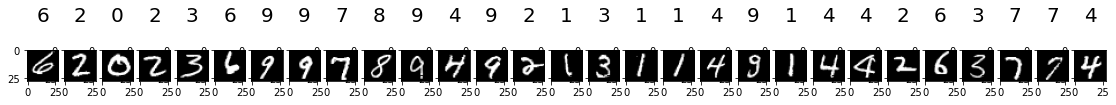

In [7]:
#Using matplotlib visualizing the digits on a larger range
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[21:50], y[21:50])):
    plt.subplot(1, 30, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('%i\n' % label, fontsize = 20)


In [8]:
#Splitting into training and testing dataset
X_train1,X_val1,y_train1,y_val1 = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42)
y_val1.shape, X_train1.shape

((8400,), (33600, 784))

In [9]:

X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42)

In [10]:
#Data pre-processing standardizing the high range 0-255 values 
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train = scaler.transform(X_train)
X_train.shape

(33600, 784)

LOGISTIC REGRESSION

In [11]:
clf = LogisticRegression(solver='lbfgs', max_iter=43000)

In [12]:
clf.fit(X_train,y_train)

LogisticRegression(max_iter=43000)

In [13]:
y_pred = clf.predict(X_val)
y_pred
X_val.shape, y_pred.shape,y_val.shape

((8400, 784), (8400,), (8400,))

In [14]:
a = np.array(y_pred)
pd.DataFrame({'Predicted classifier label' : y_pred, 'Actual' : y_val1}).to_csv('submit.csv', index = None)
# X_train[19]

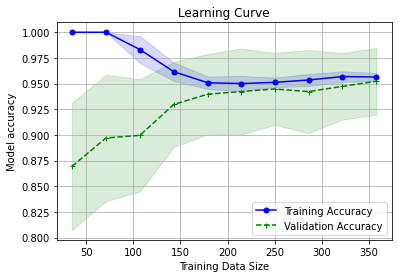

In [19]:
train_sizes, train_scores, test_scores = learning_curve(estimator=clf, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
A3 = metrics.accuracy_score(y_true=y_val1, y_pred=y_pred)
print(accuracy_score(y_val1,y_pred))
print(classification_report(y_val1, y_pred))
print(confusion_matrix(y_val1,y_pred))

0.8311904761904761
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       816
           1       0.97      0.86      0.92       909
           2       0.94      0.77      0.85       846
           3       0.88      0.85      0.86       937
           4       0.86      0.91      0.89       839
           5       0.97      0.24      0.39       702
           6       0.87      0.94      0.90       785
           7       0.95      0.83      0.89       893
           8       0.52      0.96      0.68       835
           9       0.83      0.90      0.86       838

    accuracy                           0.83      8400
   macro avg       0.87      0.82      0.82      8400
weighted avg       0.87      0.83      0.82      8400

[[792   0   0   2   3   3  10   0   6   0]
 [  1 786   3   6   1   0   2   1 107   2]
 [ 15  17 653  14  23   0  22  12  82   8]
 [  5   0  12 796   0   1  12   4  91  16]
 [  4   1   3   2 761   0  13   0  15  40]
 [ 36  

<AxesSubplot:title={'center':'Confusion Matrix for Digit Recognition'}, xlabel='Predicted label', ylabel='True label'>

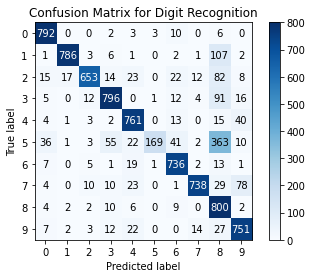

In [22]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=False, title = 'Confusion Matrix for Digit Recognition')

SVM

In [31]:

model = SVC(kernel='linear',C=10, random_state=20)
model.fit(X_train,y_train)

SVC(C=10, kernel='linear', random_state=20)

In [32]:
y_pred1 = model.predict(X_val)
y_pred1

ValueError: X has 784 features, but SVC is expecting 30 features as input.

In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
print("accuracy:", metrics.accuracy_score(y_true=y_val, y_pred=y_pred1), "\n")
A2 = metrics.accuracy_score(y_true=y_val1, y_pred=y_pred1)
print(accuracy_score(y_val,y_pred1))
print(classification_report(y_val, y_pred1))
print(confusion_matrix(y_val,y_pred1))

NameError: name 'y_pred1' is not defined

In [21]:
train_sizes, train_scores, valid_scores = learning_curve( SVC(kernel='linear'), X, y, train_sizes=[5000, 2800, 9000], cv=5)
# LearningCurveDisplay.from_estimator(
#    SVC(kernel="linear"), X, y, train_sizes=[50, 80, 110], cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

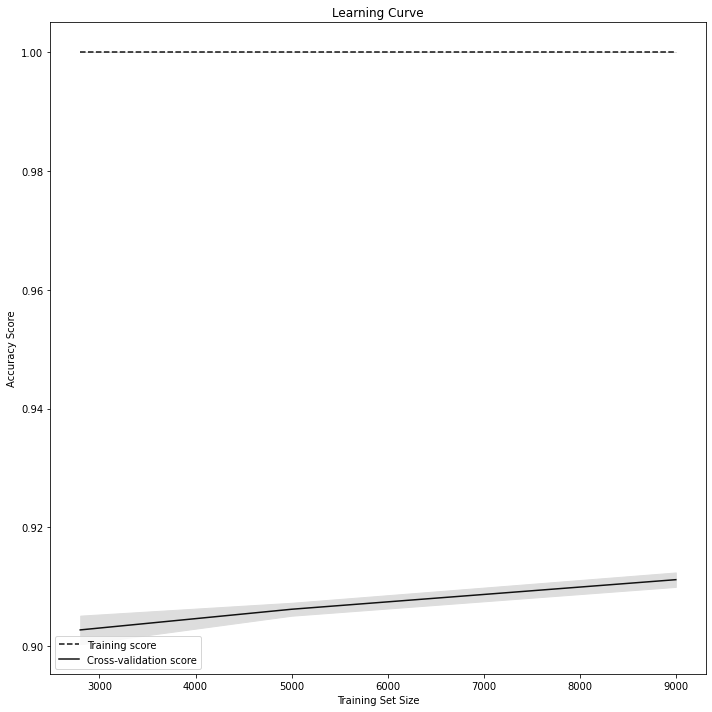

In [22]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


<AxesSubplot:title={'center':'Confusion Matrix for Digit Recognition (SVM)'}, xlabel='Predicted label', ylabel='True label'>

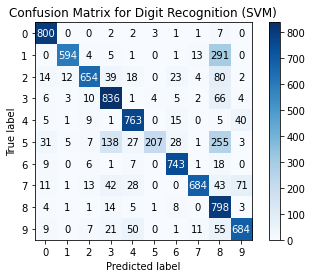

In [23]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred1, normalize=False, title = 'Confusion Matrix for Digit Recognition (SVM)')

NAIVE BAYES

In [24]:
#Calling out the Multinomial function and training it on the train_dataset
gnb = MultinomialNB()
gnb.fit(X_train1,y_train1)


MultinomialNB()

In [25]:
#Predicting output on the X_test set
y_pred2 = gnb.predict(X_val1)
y_pred2

array([8, 1, 9, ..., 3, 0, 9], dtype=int64)

In [26]:
#Printing out the classifcation reports
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
print("accuracy:", metrics.accuracy_score(y_true=y_val1, y_pred=y_pred2), "\n")
A1 = metrics.accuracy_score(y_true=y_val1, y_pred=y_pred2)
print(accuracy_score(y_val1,y_pred2))
print(classification_report(y_val1, y_pred2))
print(confusion_matrix(y_val1,y_pred2))

accuracy: 0.8275 

0.8275
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       816
           1       0.89      0.94      0.92       909
           2       0.88      0.83      0.85       846
           3       0.82      0.80      0.81       937
           4       0.83      0.73      0.78       839
           5       0.82      0.67      0.74       702
           6       0.86      0.92      0.89       785
           7       0.94      0.83      0.88       893
           8       0.67      0.78      0.72       835
           9       0.69      0.84      0.76       838

    accuracy                           0.83      8400
   macro avg       0.83      0.83      0.83      8400
weighted avg       0.83      0.83      0.83      8400

[[742   0   3   2   1  15  16   0  37   0]
 [  0 857   9   3   0   1   2   0  34   3]
 [  9  15 700  24  10   2  33   5  48   0]
 [  2  17  45 751   1  26   9  11  49  26]
 [  3   0   4   0 615   3  24   3  31 156]


<AxesSubplot:title={'center':'Confusion Matrix for Digit Recognition (Naive Bayes)'}, xlabel='Predicted label', ylabel='True label'>

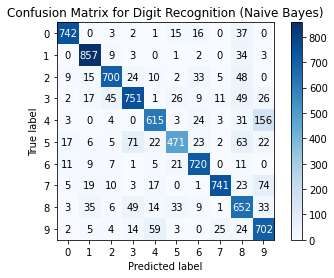

In [27]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred2, normalize=False, title = 'Confusion Matrix for Digit Recognition (Naive Bayes)')

KNN

In [28]:
#Implementing KNN algorithm by mentioning various hyperparameters
knn = KNeighborsClassifier(n_neighbors= 40,
    weights= 'distance',
    n_jobs= -1).fit(X_train1, y_train1)

In [29]:
#Predicting KNN classifier values on X_test set
y_pred3 = knn.predict(X_val1)
y_pred3

array([8, 1, 9, ..., 3, 0, 9], dtype=int64)

In [30]:
##Printing out classification and accuracy reports
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
print("accuracy:", metrics.accuracy_score(y_true=y_val1, y_pred=y_pred3), "\n")
A = metrics.accuracy_score(y_true=y_val1, y_pred=y_pred3)
print(accuracy_score(y_val1,y_pred3))
print(classification_report(y_val1, y_pred3))
print(confusion_matrix(y_val1,y_pred3))

accuracy: 0.9439285714285715 

0.9439285714285715
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       816
           1       0.89      1.00      0.94       909
           2       0.99      0.90      0.94       846
           3       0.95      0.93      0.94       937
           4       0.98      0.93      0.95       839
           5       0.95      0.94      0.95       702
           6       0.95      0.98      0.97       785
           7       0.93      0.94      0.94       893
           8       0.98      0.88      0.92       835
           9       0.89      0.94      0.92       838

    accuracy                           0.94      8400
   macro avg       0.95      0.94      0.94      8400
weighted avg       0.95      0.94      0.94      8400

[[806   0   0   0   1   1   7   0   0   1]
 [  0 905   1   0   1   0   2   0   0   0]
 [  9  29 761   5   4   1   5  24   4   4]
 [  4  10   2 875   1  11   1  12  10  11]
 [  1  12   0   0 7

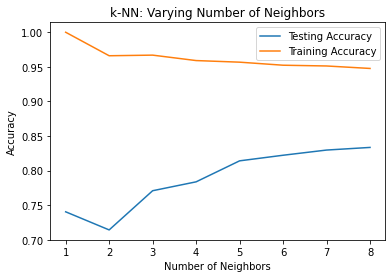

In [31]:
#Algorithm for printout the learning curve using various values of N-Neighbours
no_neighbors = np.arange(1, 9) #Making an array of 1 to 9
train_accuracy = np.empty(len(no_neighbors)) #Declaring empty arrays
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_val, y_val)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

<AxesSubplot:title={'center':'Confusion Matrix for Digit Recognition (KNN)'}, xlabel='Predicted label', ylabel='True label'>

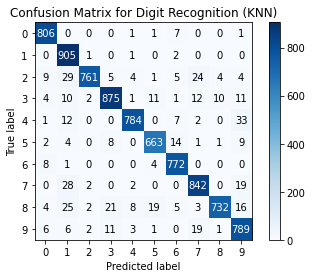

In [32]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred3, normalize=False, title = 'Confusion Matrix for Digit Recognition (KNN)')

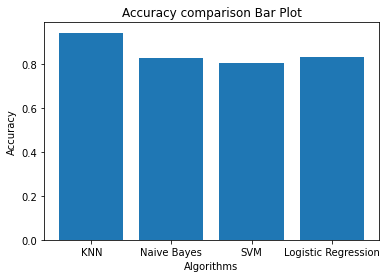

In [33]:
#Comparison of accuracy bar plot
p = [A,A1,A2,A3]
p1 = ['KNN','Naive Bayes','SVM','Logistic Regression']

plt.bar(p1,p)
plt.xlabel('Algorithms')
plt.ylabel("Accuracy")
plt.title('Accuracy comparison Bar Plot')
plt.show()